# RNN Cell Size Analysis

This notebook analyzes the effect of different RNN cell sizes on model performance.

## Import Library

In [85]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, TextVectorization, Embedding
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

## Preparation

### Load Data from CSV

In [86]:
train_df = pd.read_csv('../../../data/nusax/train.csv')
valid_df = pd.read_csv('../../../data/nusax/valid.csv')

### Preprocess Data

In [87]:
max_tokens = 5000
max_sequence_length = 54
text_vectorizer = TextVectorization(
    max_tokens=max_tokens,
    output_sequence_length=max_sequence_length,
    standardize='lower_and_strip_punctuation'
)

text_vectorizer.adapt(train_df['text'].values)

label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
train_df['label'] = train_df['label'].map(label_map)
valid_df['label'] = valid_df['label'].map(label_map)

x_train = text_vectorizer(train_df['text'])
y_train = train_df['label']
x_val = text_vectorizer(valid_df['text'])
y_val = valid_df['label']

## Model Training

Variants:
1. 32 Cells per layer
2. 64 Cells per layer
3. 128 Cells per layer

### Variant 1: 32 Cells per layer

In [88]:
model_1 = Sequential([
    Embedding(max_tokens, 100, input_length=max_sequence_length),
    SimpleRNN(32),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_val, y_val),
)

Epoch 1/30


/Users/maulvizm/Education/Machine Learning/if3270-tubes-2/.venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3798 - loss: 1.0996 - val_accuracy: 0.4100 - val_loss: 1.0834
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6824 - loss: 0.9301 - val_accuracy: 0.3300 - val_loss: 1.1284
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8407 - loss: 0.6820 - val_accuracy: 0.4200 - val_loss: 1.0954
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9602 - loss: 0.4254 - val_accuracy: 0.4500 - val_loss: 1.0938
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9944 - loss: 0.2693 - val_accuracy: 0.4600 - val_loss: 1.1239
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9951 - loss: 0.1771 - val_accuracy: 0.4800 - val_loss: 1.1764
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.1201 - val_accuracy: 0.4600 - val_loss: 1.1774
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0859 - val_accuracy: 0.4600 - val_loss: 1.2078
Epoch 9/30
8/8 ━━

### Variant 2: 64 Cells per layer

In [89]:
model_2 = Sequential([
    Embedding(max_tokens, 100, input_length=max_sequence_length),
    SimpleRNN(64),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_val, y_val),
)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4004 - loss: 1.0958 - val_accuracy: 0.4700 - val_loss: 1.0206
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5979 - loss: 0.8583 - val_accuracy: 0.4300 - val_loss: 1.2021
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8694 - loss: 0.4828 - val_accuracy: 0.4700 - val_loss: 1.3331
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9098 - loss: 0.3137 - val_accuracy: 0.4800 - val_loss: 1.4398
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9718 - loss: 0.1715 - val_accuracy: 0.5100 - val_loss: 1.6004
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9888 - loss: 0.0983 - val_accuracy: 0.4800 - val_loss: 1.7384
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9955 - loss: 0.0585 - val_accuracy: 0.5000 - val_loss: 1.9007
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9969 - loss: 0.0430 - val_accuracy: 0.4900 - val_loss: 2.1702
Epoch 9

### Varian 3: 128 Cells per layer

In [90]:
model_3 = Sequential([
    Embedding(max_tokens, 100, input_length=max_sequence_length),
    SimpleRNN(128),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_3 = model_3.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_val, y_val),
)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3991 - loss: 1.0865 - val_accuracy: 0.5100 - val_loss: 1.0226
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5856 - loss: 0.8943 - val_accuracy: 0.4400 - val_loss: 1.0921
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8702 - loss: 0.5500 - val_accuracy: 0.4100 - val_loss: 1.1986
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9724 - loss: 0.2204 - val_accuracy: 0.4800 - val_loss: 1.3185
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0805 - val_accuracy: 0.4700 - val_loss: 1.4315
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9951 - loss: 0.0333 - val_accuracy: 0.4800 - val_loss: 1.7120
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0155 - val_accuracy: 0.4500 - val_loss: 1.7674
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 0.4400 - val_loss: 1.8366
Epoch 

## Model Evaluation

In [91]:
def evaluate_model(model, x_val, y_val, history):
    y_pred = model.predict(x_val)
    y_pred_classes = y_pred.argmax(axis=1)
    
    f1 = f1_score(y_val, y_pred_classes, average='macro')
    print(classification_report(y_val, y_pred_classes))
    print(f"Macro F1-score: {f1:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return f1

### Evaluate Training Loss and Validation Loss for Each Model

#### Model 1


Evaluating Model 1 (32 cells per layer):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

           0       0.50      0.53      0.51        38
           1       0.35      0.46      0.40        24
           2       0.34      0.26      0.30        38

    accuracy                           0.41       100
   macro avg       0.40      0.42      0.40       100
weighted avg       0.41      0.41      0.40       100

Macro F1-score: 0.4038


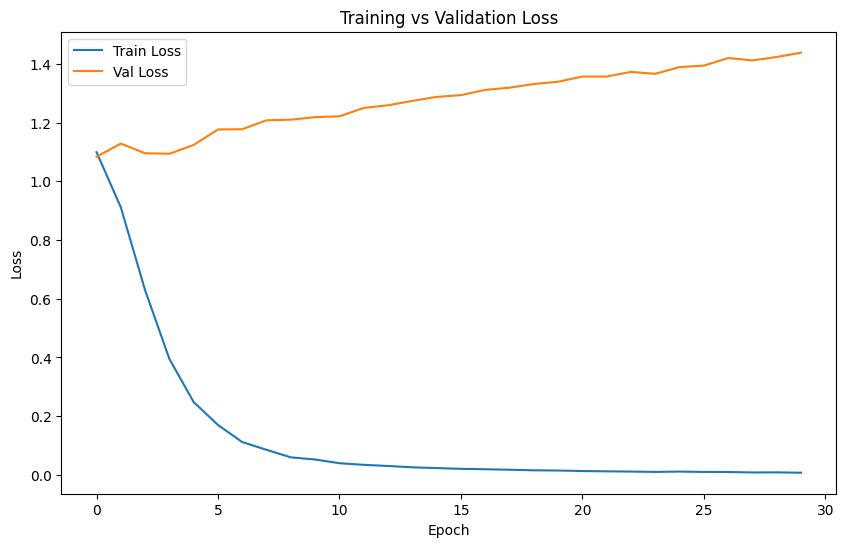

In [92]:
print("\nEvaluating Model 1 (32 cells per layer):")
f1_1 = evaluate_model(model_1, x_val, y_val, history_1)

#### Model 2


Evaluating Model 2 (64 cells per layer):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

           0       0.49      0.87      0.62        38
           1       0.40      0.25      0.31        24
           2       0.35      0.16      0.22        38

    accuracy                           0.45       100
   macro avg       0.41      0.43      0.38       100
weighted avg       0.41      0.45      0.39       100

Macro F1-score: 0.3828


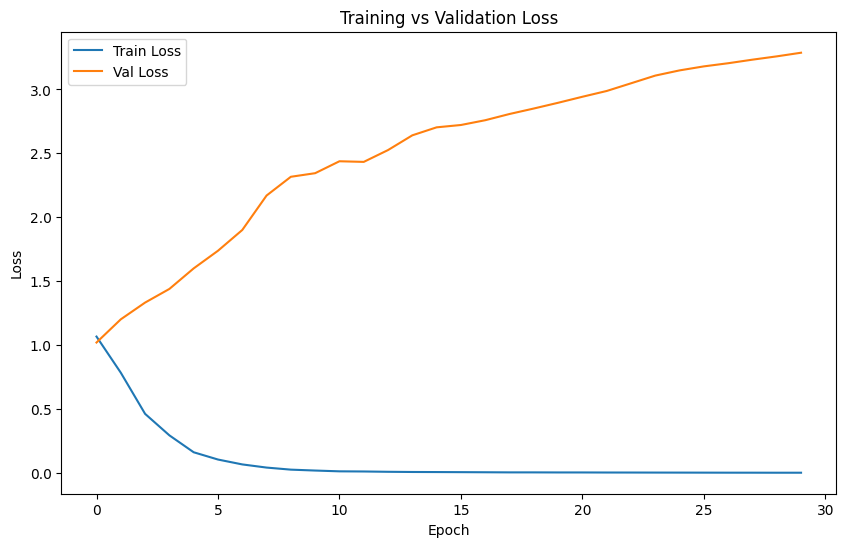

In [93]:
print("\nEvaluating Model 2 (64 cells per layer):")
f1_2 = evaluate_model(model_2, x_val, y_val, history_2)

#### Model 3


Evaluating Model 3 (128 cells per layer):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

           0       0.52      0.84      0.64        38
           1       0.24      0.21      0.22        24
           2       0.41      0.18      0.25        38

    accuracy                           0.44       100
   macro avg       0.39      0.41      0.37       100
weighted avg       0.41      0.44      0.39       100

Macro F1-score: 0.3723


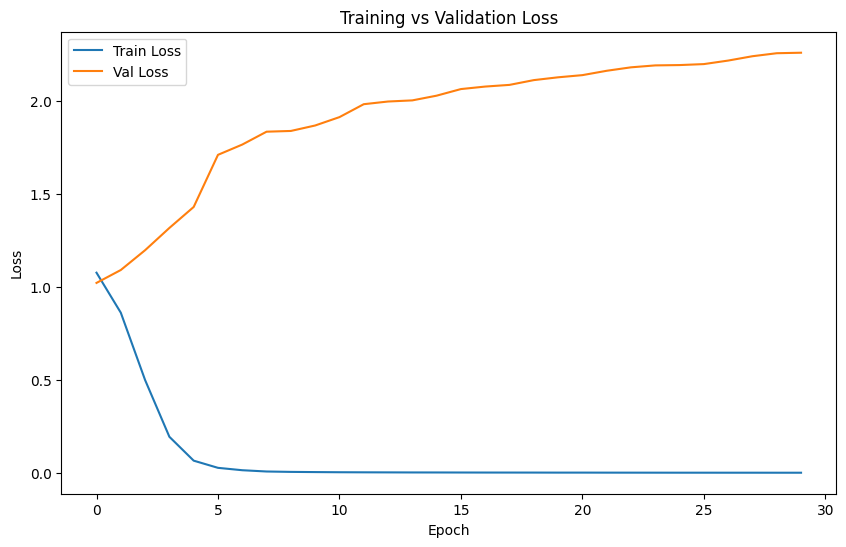

In [94]:
print("\nEvaluating Model 3 (128 cells per layer):")
f1_3 = evaluate_model(model_3, x_val, y_val, history_3)

### Validation Loss Comparison

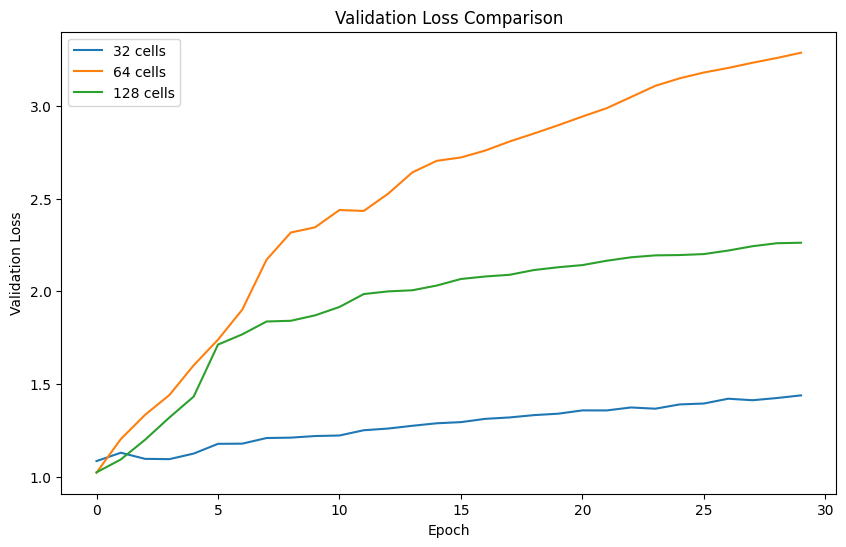

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['val_loss'], label='32 cells')
plt.plot(history_2.history['val_loss'], label='64 cells')
plt.plot(history_3.history['val_loss'], label='128 cells')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

### Training Loss Comparison

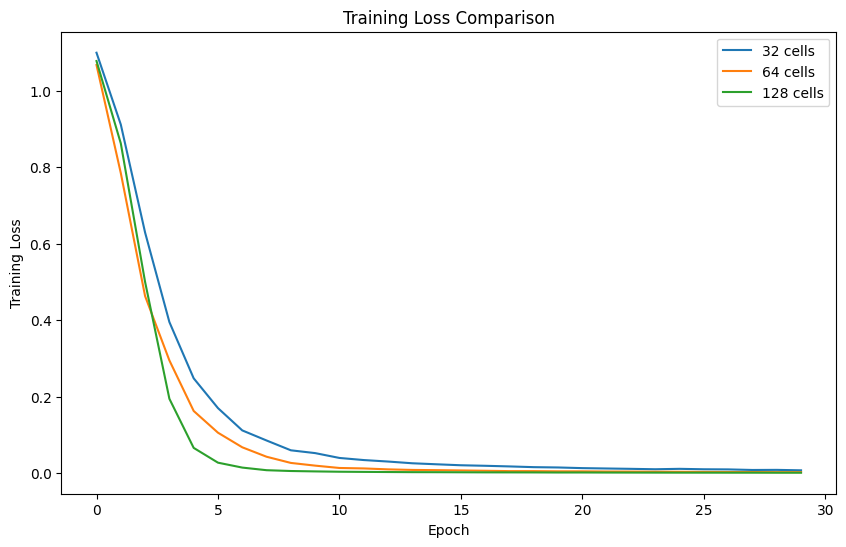

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['loss'], label='32 cells')
plt.plot(history_2.history['loss'], label='64 cells')
plt.plot(history_3.history['loss'], label='128 cells')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

### Accuracy Comparison

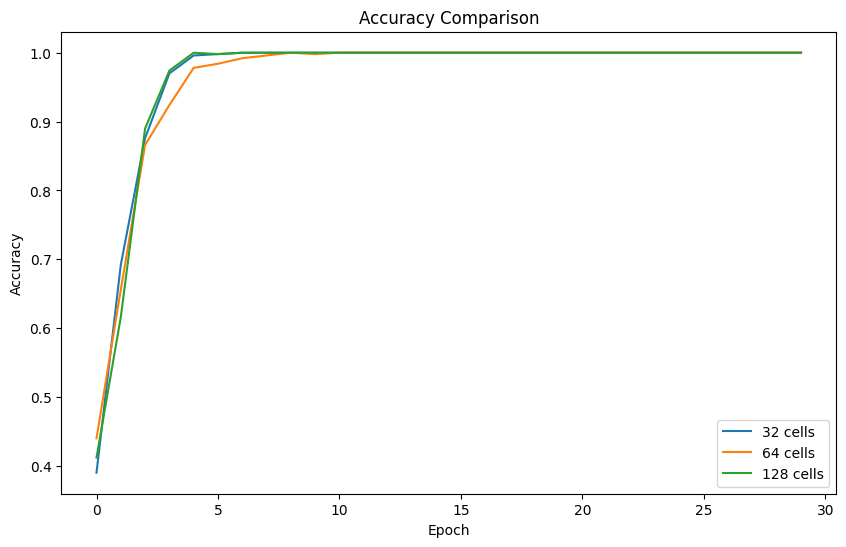

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['accuracy'], label='32 cells')
plt.plot(history_2.history['accuracy'], label='64 cells')
plt.plot(history_3.history['accuracy'], label='128 cells')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### F1 Score Comparison

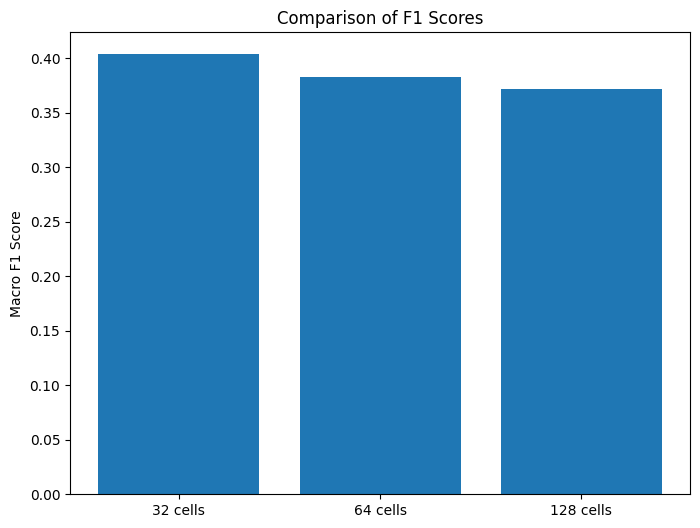

In [98]:
plt.figure(figsize=(8, 6))
plt.bar(['32 cells', '64 cells', '128 cells'], [f1_1, f1_2, f1_3])
plt.title('Comparison of F1 Scores')
plt.ylabel('Macro F1 Score')
plt.show()